# Steps

## Import the Packages

## Read the Data
- Read CSV file using `read_csv()`.

## Exploring Data Dimensions
- `shape` 
- `info()` 
- `head()` 
- `describe()`

## Handling Missing Data
- Check missing values using `isnull().sum()`.
- Fill missing values using `fillna()`.

## Data Visualization
- **Histogram**: Understanding the distribution of numerical data.
- **Outlier Detection**: Use box plot.
- **Relationship Study**: Use line, bar, scatter plots, and heatmap.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Task - to check relationship of attributes with the IMDB score

### Refer to visualisation 2 all those steps need to be done

In [95]:
movies_df = pd.read_csv("Datasets/movie_metadata.csv")
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [96]:
movies_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [97]:
movies_df["gross"].fillna(movies_df["gross"].mean, inplace=True)
movies_df["color"].fillna(movies_df["color"].mode()[0], inplace=True)

/var/folders/zm/sqf2my0502g0t5fn42g5mlrr0000gn/T/ipykernel_85984/2768266566.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040            NaN
5041        10443.0
5042        85222.0
Name: gross, Length: 5043, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movies_df["gross"].fillna(movies_df["gross"].mean, inplace=True)
/var/folders/zm/sqf2my0502g0t5fn42g5mlrr0000gn/T/ipykernel_85984/2768266566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

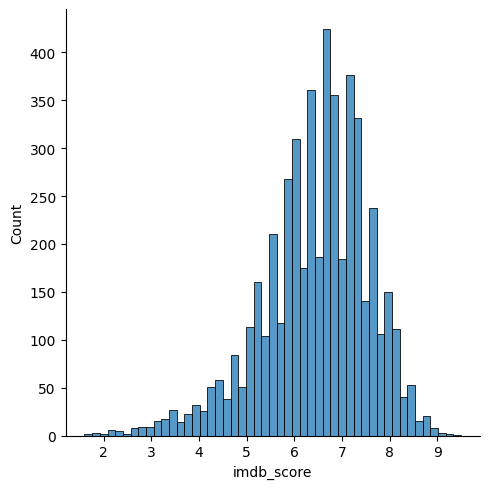

In [98]:
sns.displot(x='imdb_score', data=movies_df)

### Observation it is left skewed and imdb scores lie between 5 and 8

## Task - interpret information from movie metadata
### What if my data has duplicates? Remove them

In [99]:
movies_df.shape

(5043, 28)

In [100]:
movies_df[movies_df.duplicated()].index

Index([ 137,  187,  204,  303,  389,  395,  590,  656,  794, 1220, 1305, 1449,
       2169, 2292, 2472, 2493, 2533, 2562, 2568, 2619, 2771, 2777, 2798, 2971,
       3117, 3345, 3452, 3480, 3729, 3900, 3915, 4182, 4226, 4282, 4313, 4408,
       4565, 4573, 4631, 4769, 4882, 4927, 4942, 4950, 4951],
      dtype='int64')

In [101]:
movies_df.drop(movies_df[movies_df.duplicated()].index, inplace=True)

In [102]:
movies_df.shape

(4998, 28)

### how many rows are duplicated in one column

In [103]:
movies_df[movies_df.duplicated(['movie_imdb_link'])].shape

# 79 columns are duplicated in the movie imdb link row

(79, 28)

## Sample DF - to identify and remove outliers

### consider the set of heights
### here 300 can be an outlier

In [104]:
sample_df = pd.DataFrame([[150],[160],[170],[140],[180],[300]],columns=['Height'])
sample_df

,Height
0,150
1,160
2,170
3,140
4,180
5,300


<Axes: ylabel='Height'>

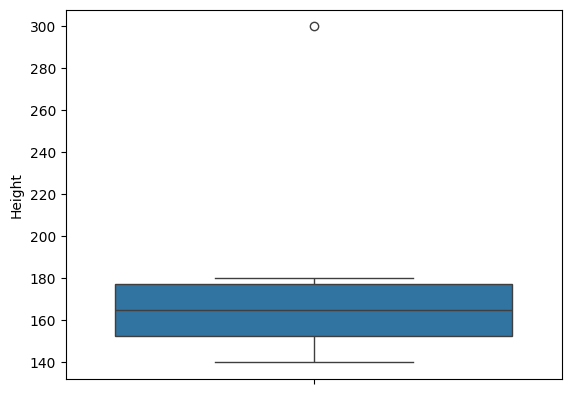

In [105]:
sns.boxplot(sample_df['Height'])

### Observation - Most of data is there in the range but 300 is an outlier

#### Whatever beyond the wiskers are outliers

## Task - write a function to remove outliers

In [106]:
def outlier_treatment(column):
    # sort in ascending order and calculate the percentiles
    sorted(column)
    # now we have to compute q1 and q3
    # q1 is 25th percentile
    # q3 is 75th percentile
    q1, q3 = np.percentile(column, [25, 75])
    # find IQR
    iqr = q3 - q1
    # 1.5 IQR rule
    # whatever is beyond 1.5 IQR range is outliers
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    return lower, upper

In [107]:
lower, upper = outlier_treatment(sample_df['Height'])
print(lower, upper)

115.0 215.0


### Observation - whatever below 115 and above 215 are outliers, these are the wiskers in the box plot

In [108]:
# now remove these outliers

sample_df[(sample_df['Height'] > upper) | (sample_df['Height'] < lower)]

,Height
5,300


In [109]:
# use the index and drop the outlier

sample_df.drop(sample_df[(sample_df['Height'] > upper) | (sample_df['Height'] < lower)].index, inplace=True)

In [110]:
sample_df

,Height
0,150
1,160
2,170
3,140
4,180


<Axes: ylabel='Height'>

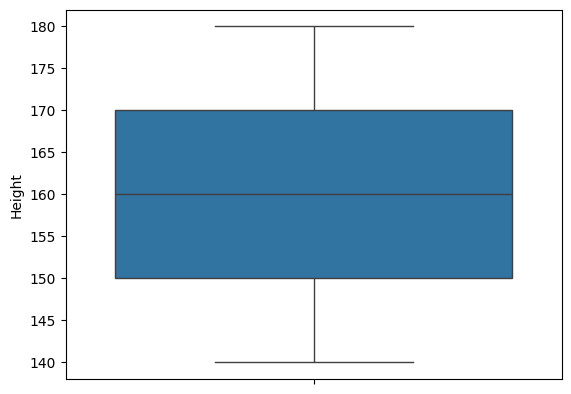

In [111]:
sns.boxplot(sample_df['Height'])

## going back to movies db

<Axes: ylabel='facenumber_in_poster'>

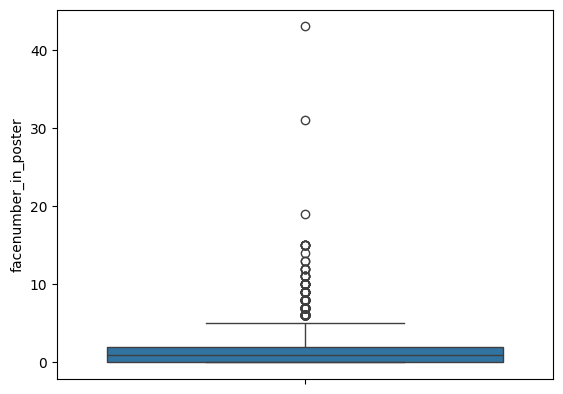

In [112]:
sns.boxplot(movies_df['facenumber_in_poster'])

### Reuse the outlier treatment function

In [113]:
lower, upper = outlier_treatment(movies_df['facenumber_in_poster'])
print(lower, upper)

nan nan


### so there are missing first lets handle this

In [114]:
movies_df['facenumber_in_poster'].isnull().sum()

np.int64(13)

In [121]:
# lets remove these 13 rows
movies_df.dropna(subset="facenumber_in_poster", inplace=True)

In [122]:
movies_df['facenumber_in_poster'].isnull().sum()

np.int64(0)

In [125]:
lower, upper = outlier_treatment(movies_df['facenumber_in_poster'])
print(lower, upper)

-3.0 5.0


In [127]:
movies_df.shape

(4985, 28)

In [128]:
movies_df.drop(movies_df[(movies_df['facenumber_in_poster'] > upper) | (movies_df['facenumber_in_poster'] < lower)].index, inplace=True)

In [129]:
movies_df.shape

(4777, 28)

<Axes: ylabel='facenumber_in_poster'>

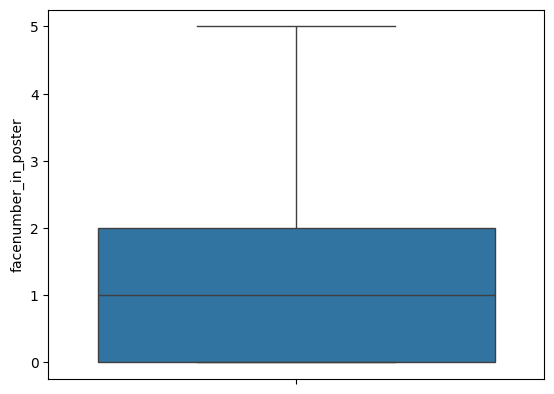

In [130]:
sns.boxplot(movies_df['facenumber_in_poster'])

In [133]:
movies_df.isnull().sum()

color                          0
director_name                 98
num_critic_for_reviews        45
duration                      13
director_facebook_likes       98
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                139
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               287
budget                       462
title_year                   102
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 302
movie_facebook_likes           0
dtype: int64

## Observation 

### For a problem statement check what variables are important then only go and remove outliers for it
### dont remove outliers for other variables

## Task - which movie genres are having imdb scores greater than 8
### top 5

In [145]:
movies_df[movies_df['imdb_score'] > 8.0]['genres'].value_counts().head(5)

genres
Drama                           17
Crime|Drama                     12
Crime|Drama|Thriller             6
Crime|Drama|Mystery|Thriller     6
Action|Adventure|Sci-Fi          4
Name: count, dtype: int64

## which movie has highest number of facebook likes

In [156]:
movies_df[['movie_title', 'movie_facebook_likes']].sort_values(by='movie_facebook_likes', ascending=False).head()

,movie_title,movie_facebook_likes
96,Interstellar,349000
296,Django Unchained,199000
10,Batman v Superman: Dawn of Justice,197000
128,Mad Max: Fury Road,191000
179,The Revenant,190000


## what is the average budget for all the content ratings?

In [164]:
movies_df.groupby(['content_rating']).agg({'budget': 'mean'}).sort_values(by='budget', ascending=False)

,budget
content_rating,
PG-13,5.449747e+07
PG,4.936923e+07
G,4.523497e+07
R,3.442208e+07
TV-MA,3.400000e+07
NC-17,7.940714e+06
GP,5.550000e+06
Unrated,5.264715e+06
M,4.700000e+06


## lets do binning
## prepare a bin for IMDB score

### 0-4 : poor, 4-7: moderate, 7-10: good
### result: movie title, imdb_score, imdb_label

In [175]:
movies_df = pd.read_csv("Datasets/movie_metadata.csv")
score_bin = [0, 4, 7, 10]
imdb_label = ['Poor', 'Moderate', 'Good']

movies_df['IMDB Label'] = pd.cut(movies_df["imdb_score"], bins=score_bin, labels=imdb_label)

In [176]:
movies_df['IMDB Label'].value_counts()

IMDB Label
Moderate    3275
Good        1594
Poor         174
Name: count, dtype: int64

In [ ]:
movies_df[['movie_title', 'IMDB Label', 'imdb_score']].head()

,movie_title,IMDB Label,imdb_score
0,Avatar,Good,7.9
1,Pirates of the Caribbean: At World's End,Good,7.1
2,Spectre,Moderate,6.8
3,The Dark Knight Rises,Good,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Good,7.1


# Feature Engineering

## Data normalisation and Standardisation of variables
### Numeric - minmax scaling, standard scaling

Example:

| YOE | Salary | Min-Max of YOE      | Min-Max of Salary |
|-----|--------|---------------------|-------------------|
| 1   | 10000  | (1 - 1) / (7 - 1) = 0   |                   |
| 3   | 20000  | (3 - 1) / (7 - 1) = 0.3333 |               |
| 4   | 25000  | (4 - 1) / (7 - 1) = 0.5   |               |
| 7   | 40000  | (7 - 1) / (7 - 1) = 1     |               |


now if a new person comes with 10 years.. how much salary to give

### is it right to compare YOE with Salary
### Make YOE and Salary in same range

## Two techniques for numeric

### Minmax (Formula)
#### X - Xmin / (Xmax - Xmin)
#### values here now in salary is changed to between 0 and 1
#### y? relationship between the variables will be better
#### so both YOE and Salary will be same

### Standard (Formula)
#### X - mu / (sigma)
#### mu - is the average and sigma is the standard deviation

## minmax -> 0 to 1 
## std deviation -> we get negative scales also (-1 to +1 or -3 to +3 or -6 to +6)

In [178]:
salary_df = pd.read_csv("Datasets/Salary_Data.csv")

In [180]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


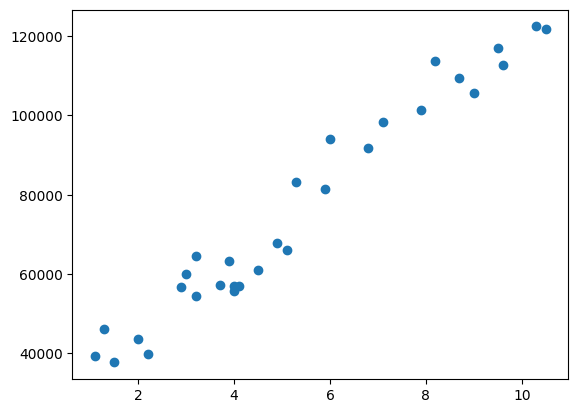

In [182]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])

## here we can see a positive relationship as YOE increases salary increases
## Lets do minmax scaling to have values in the same range

### import from scikit learn

In [183]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [184]:
mm_scaler = MinMaxScaler()

In [185]:
salary_df_transformed = mm_scaler.fit_transform(salary_df)

#fit transform will perform the calculation for that min max scaling and trnasform the dataframe

In [187]:
salary_df_transformed
# now all these values have been transformed

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382],
       [0.19148936, 0.22337586],
       [0.20212766, 0.26481219],
       [0.22340426, 0.19742499],
       [0.22340426, 0.31554453],
       [0.27659574, 0.229837  ],
       [0.29787234, 0.30105126],
       [0.30851064, 0.21335932],
       [0.30851064, 0.22709662],
       [0.31914894, 0.2285613 ],
       [0.36170213, 0.27616348],
       [0.40425532, 0.35680369],
       [0.42553191, 0.33425467],
       [0.44680851, 0.53575478],
       [0.5106383 , 0.51537916],
       [0.5212766 , 0.66393811],
       [0.60638298, 0.63792818],
       [0.63829787, 0.7151193 ],
       [0.72340426, 0.75089771],
       [0.75531915, 0.89866525],
       [0.80851064, 0.84691708],
       [0.84042553, 0.80145287],
       [0.89361702, 0.93595559],
       [0.90425532, 0.88476258],
       [0.9787234 , 1.        ],
       [1.        , 0.9938696 ]])

In [188]:
# now its a numpy array make this into a dataframe

new_df = pd.DataFrame(salary_df_transformed, columns=["YearsExp", "Salary"])

In [189]:
new_df

,YearsExp,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


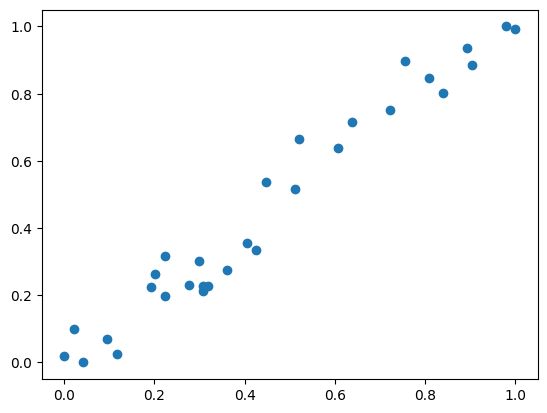

In [190]:
plt.scatter(new_df['YearsExp'], new_df['Salary'])

### nothing changed in the graph but the data is now standardised

## Standard Scaler
### transformation based on standard scaling

In [191]:
std_scaler = StandardScaler()

In [192]:
salary_df_transformed_std_scaling = std_scaler.fit_transform(salary_df)

In [193]:
salary_df_transformed_std_scaling

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [194]:
new_df_std_scaler = pd.DataFrame(salary_df_transformed_std_scaling, columns=["YearsExp", "Salary"]) 

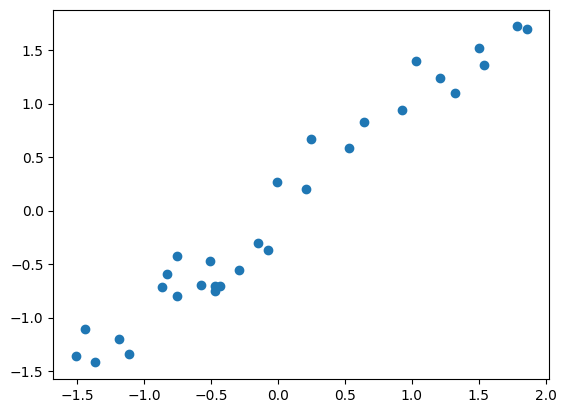

In [195]:
plt.scatter(new_df_std_scaler["YearsExp"], new_df_std_scaler["Salary"])

# Normalising Categorical data

| Car Model Type
--------------
| SUV            |
Sedan |
Hatchback |
Sedan |

## We will convert this to numerical data
## Two techniques

### one hot encoding
#### every unique value in the column will become an individual columns in data
Unique - SUV Sedan Hatcback 

| Car Model  | SUV | Sedan | Hatchback |
|------------|-----|-------|----------|
| SUV        | 1   | 0     | 0        |
| Sedan      | 0   | 1     | 0        |
| Hatchback  | 0   | 0     | 1        |
| Sedan      | 0   | 1     | 0        |


### Label encoding
#### no multiple columns
#### only one column sequentially (alphabetically ) it will get value
#### sorted -> Hatchback (0), Sedan(1), SUV(2)

| Car Model Type | Label Encoding
--------------|----------
| SUV            | 2
Sedan | 1
Hatchback | 0
Sedan | 1